<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Studying--the-dataset" data-toc-modified-id="Studying--the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Studying  the dataset</a></span><ul class="toc-item"><li><span><a href="#info,-describe" data-toc-modified-id="info,-describe-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>info, describe</a></span></li><li><span><a href="#checking-the-null-values" data-toc-modified-id="checking-the-null-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>checking the null values</a></span></li></ul></li><li><span><a href="#NOTEBOOK-REVIEW---TOP-SCORES" data-toc-modified-id="NOTEBOOK-REVIEW---TOP-SCORES-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>NOTEBOOK REVIEW - TOP SCORES</a></span><ul class="toc-item"><li><span><a href="#https://www.kaggle.com/evgenypotapov/notebook602c8b4de2" data-toc-modified-id="https://www.kaggle.com/evgenypotapov/notebook602c8b4de2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://www.kaggle.com/evgenypotapov/notebook602c8b4de2" target="_blank">https://www.kaggle.com/evgenypotapov/notebook602c8b4de2</a></a></span></li><li><span><a href="#https://www.kaggle.com/maryragozina/notebook9849f51564" data-toc-modified-id="https://www.kaggle.com/maryragozina/notebook9849f51564-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><a href="https://www.kaggle.com/maryragozina/notebook9849f51564" target="_blank">https://www.kaggle.com/maryragozina/notebook9849f51564</a></a></span></li><li><span><a href="#https://www.kaggle.com/andrej0marinchenko/titanic-machine-learning-from-disaster/data" data-toc-modified-id="https://www.kaggle.com/andrej0marinchenko/titanic-machine-learning-from-disaster/data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><a href="https://www.kaggle.com/andrej0marinchenko/titanic-machine-learning-from-disaster/data" target="_blank">https://www.kaggle.com/andrej0marinchenko/titanic-machine-learning-from-disaster/data</a></a></span></li></ul></li></ul></div>

# Studying  the dataset 

In [34]:
import numpy as np
import pandas as pd
import os
import re
import warnings
import io
import requests
import seaborn as sns

In [23]:
df = pd.read_csv('train.csv')

## info, describe

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## checking the null values
- we should drop cabin (containing more than 77% of null values)
- age has almost 20% of null values, so it's better to replace them using the avg.
- Embarked has less than 1%, so we could drop it. Too small, probably won't affect the result.

In [30]:
nullsdf=pd.DataFrame(df.isna().sum()/len(df))

In [31]:
nullsdf

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


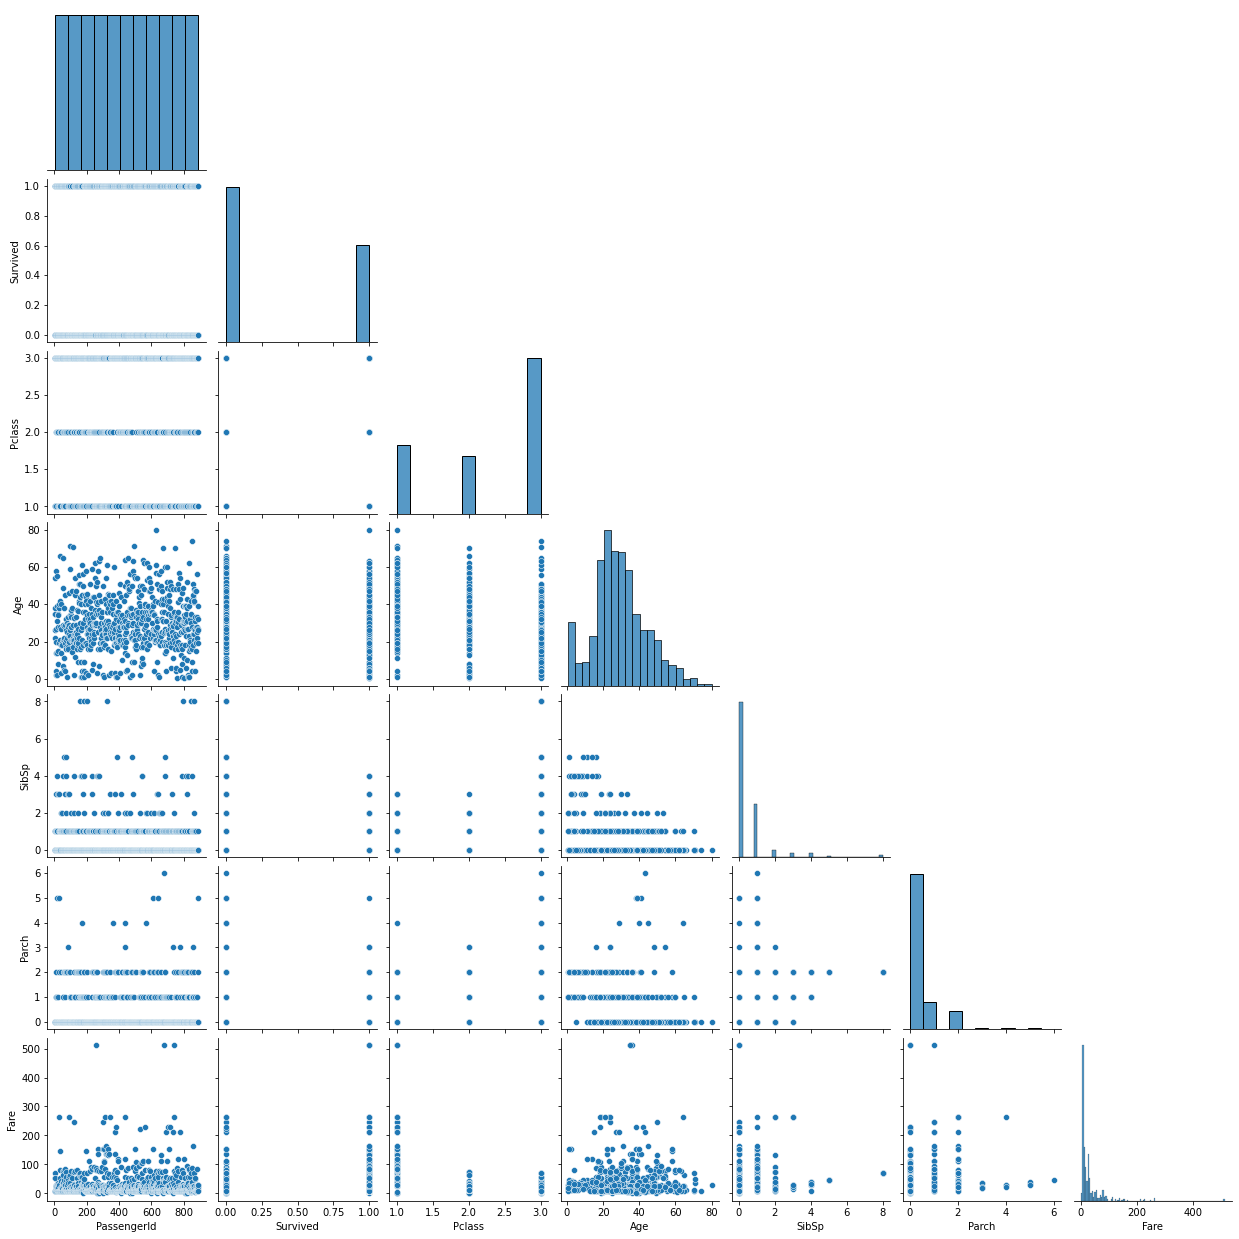

In [39]:
sns.pairplot(df,corner=True);

# NOTEBOOK REVIEW - TOP SCORES

## https://www.kaggle.com/evgenypotapov/notebook602c8b4de2

## https://www.kaggle.com/maryragozina/notebook9849f51564
- does the same as the first one, with small differece in the code.

In [2]:


url="https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
 
test_data_with_labels = c
test_data = pd.read_csv('test.csv')

In [3]:
for i, name in enumerate(test_data_with_labels['name']):
    if '"' in name:
        test_data_with_labels['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test_data['Name']):
    if '"' in name:
        test_data['Name'][i] = re.sub('"', '', name)
        
survived = []

for name in test_data['Name']:
    survived.append(int(test_data_with_labels.loc[test_data_with_labels['name'] == name]['survived'].values[-1]))

<ipython-input-3-9f1601d802e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_with_labels['name'][i] = re.sub('"', '', name)
<ipython-input-3-9f1601d802e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Name'][i] = re.sub('"', '', name)


In [20]:
survived

[0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


## https://www.kaggle.com/andrej0marinchenko/titanic-machine-learning-from-disaster/data
- do a nice EDA, but in the end apply the same code as the others...